# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**   
Провести анализ данных при помощи которых предприятие разработает стратегию взаимодействия с клиентами.


**Задачи исследования**   
- Изучить следующие параметры: площадь, цена, число комнат, высота потолков.
- Изучить время продажи квартиры. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Узнать, когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Узнать, какие факторы больше всего влияют на стоимость квартиры. Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
- Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. 
- Выделить сегмент квартир в центре. Проанализировать территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

# Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение общей информации

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/3_Исследовательский_анализ_данных /real_estate_data.csv', sep='\t')
display(df.head())
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В данных есть много некорректных значений и пропусков. Например пропуски в значениях могут означать, что такого параметра у клиента нет(колличество балконов), пропуски в таких параметрах можно заменить на ноль. Также клиент может ошибиться в написании значения(высота потолков 20м), что может приветси к аномальным значениям. Прежде чем приступить к расчетам, необходимо привести данные к нормальному виду.

## Предобработка данных

In [19]:
# определение пропущенных значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
# пропуски в количестве балконов (balcony)
df['balcony'] = df['balcony'].fillna(0)

# пропуски в количестве этажей в доме (floors_total) заменяем на этаж, гдк находится сама квартира 
df['floors_total'] = df['floors_total'].fillna(df['floor'])

# пропуски в жилой площади (living_area)
df['living_area'] = df['living_area'].fillna(df.groupby('total_area')['living_area'].transform('median'))

# пропуски в площади кухни (kitchen_area)
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('living_area')['kitchen_area'].transform('median'))

# изменяем пропуски в количестве водоемов (ponds_around3000)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

# изменяем пропуски расстояния до ближайшего парка (parks_nearest)
df['parks_nearest'] = df['parks_nearest'].fillna(0)

# изменяем пропуски в количестве комнат (rooms)
df.loc[(df['studio'] == True) & df['rooms'] == 1, 'rooms'] = 0

# приводим названия населенного пункта (locality_name) к одному регистру 
df['locality_name'] = df['locality_name'].str.lower()

# изменяем высоту потолков (ceiling_height) 
df.loc[(df['ceiling_height'] >= 20), 'ceiling_height'] = df['ceiling_height'] / 2
df['ceiling_height'] = df['ceiling_height'].replace(1, 10)
df['ceiling_height'] = df['ceiling_height'].replace(1.2, 12)
df['ceiling_height'] = df['ceiling_height'].replace(50, 10)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

# повторная проверка пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area               143
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              201
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Пропуски в количестве балконов, возможно, означают то, что балкон в квартире отсутствует вовсе. Заменим значение "NaN" на число "0".
2. Можно предположить, что пропуски в количестве этажей равны самому этажу в доме.
3. Пропуски в жилой (living_area) и кухонной (kitchen_area) площади заменим на медианное значение.
4. Заменяем значение "NaN" на число "0" в количестве водоемов т.к. скорее всего это означает, что в радиусе 3км их нет.
5. Заменяем значение "NaN" на число "0" в расстоянии до ближайшего парка, т.к. парка рядом с домом нет.
6. Изменяем пропуски в количестве комнат (rooms). Если значение 'studio' равна 'True', значит квартира однокомнатная. 
7. Приводим названия населенного пункта (locality_name) к одному регистру с помощью "str.lower()"
8. Изменяем высоту потолков (ceiling_height).

In [21]:
print(df.info())

# изменяем тип данных по количеству дней размещения обьявления (days_exposition)
df['days_exposition'] = df['days_exposition'].round().astype('Int64')

# изменяем тип данных цены (last_price) 
df['last_price'] = df['last_price'].round().astype('Int64')

# изменяем тип данных в значении площади квартиры (total_area) 
df['total_area'] = df['total_area'].round().astype('Int64')

# приводим данные размещения обьявления (first_day_exposition) к времменному типу 'datetime64'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23556 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23498 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           23699 non-null float64
ponds_around30

 С помощью метода astype() изменяем тип данных по количеству дней размещения обьявления (days_exposition), цены на момент снятия с публикации(last_price), площади квартиры (total_area) из вещественного типа данных в целочисленный, а также приводим данные размещения обьявления (first_day_exposition) к времменному типу 'datetime64'.
 
 
 
 

## Расчёты и добавление результатов в таблицу

In [22]:
# расчитываем цену за квадратный метр
df['price_meter'] = (df['last_price'] / df['total_area']).round()
df['price_meter'] = df['price_meter'].astype('Int64')

# извлекаем из данных день недели, месяц и год публикации объявления
df['first_day_weekday'] = df['first_day_exposition'].dt.weekday
df['first_month'] = df['first_day_exposition'].dt.month
df['first_year'] = df['first_day_exposition'].dt.year

# этаж квартиры делим на категории
def floor_definition(df):
    if df['floor'] == 1:
        return 'первый'
    elif (df['floors_total'] == df['floor']) & (df['floor'] != 1):
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_definition, axis = 1)

# соотношение жилой (living_area) и общей площади(total_area), а также отношение площади кухни (kitchen_area) к общей (total_area).
df['ratio_living_total_area'] = (df['living_area'] / df['total_area']).round(2)
df['retio_kitchen_total_area'] = (df['kitchen_area'] / df['total_area']).round(2)

df.head()
#df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_weekday,first_month,first_year,floor_category,ratio_living_total_area,retio_kitchen_total_area
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81,83750,1,12,2018,первый,0.46,0.28
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2.0,574.0,558,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,2.65,14.0,95.0,9,NaN,...,3.0,234.0,424,408176,4,7,2015,другой,0.60,0.10
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121,100000,1,6,2018,другой,0.32,0.41


В таблицу были добавлены расчеты по ценам за квадратный метр (price_meter), извлечены конкретные данные из даты публикации, этажи квартир разделены на категории и посчитано соотношение жилой (living_area) и общей площади(total_area), а также отношение площади кухни (kitchen_area) к общей (total_area).


## Исследовательский анализ данных

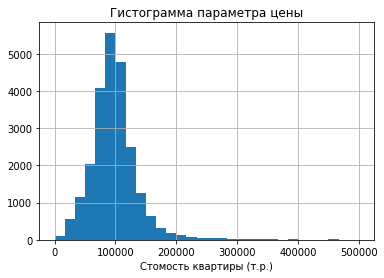

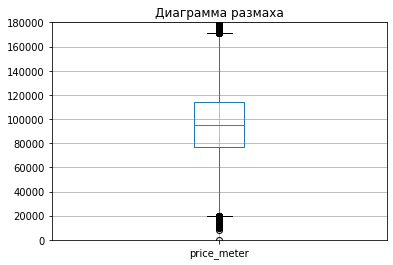

In [23]:
# построем гистограмму на параметр цены
df['price_meter'].hist(bins=30, range=(0, 500000))
plt.title('Гистограмма параметра цены')
plt.xlabel('Стомость квартиры (т.р.)')
plt.show()

# с помощью диаграммы размаха "boxplot()" смотрим редкие и выбивающиеся значения цены за квадратный метр
df.boxplot('price_meter')
plt.title('Диаграмма размаха')
plt.ylim(0, 180000)
plt.show()

Была построена гистограмма на параметр цены(взята цена за квадратный метр), в которой показано, что максимальная стоимость цены доходит почти до 500000 т.р. за квадратный метр. Этих максимальных значений очень мало, поэтому можно расценивать их как редкие и выбивающиеся.С помощью диаграммы размаха "boxplot()" выявлены аномальные значения, которые входят в диапазон до 20000 и после 170000, их можно исключить для более чистого исследования и анализа данных.

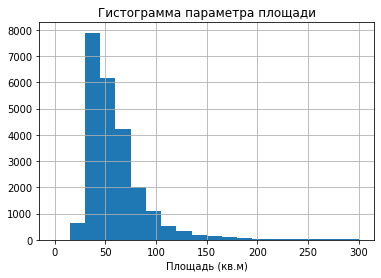

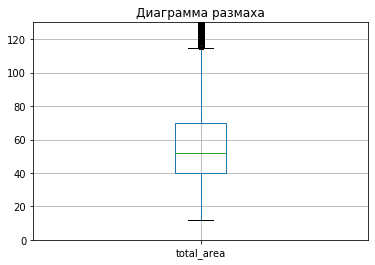

In [24]:
# построена гистограмма на параметр площади
df['total_area'].hist(bins=20, range=(0, 300))
plt.title('Гистограмма параметра площади')
plt.xlabel('Площадь (кв.м)')
plt.show()

# с помощью диаграммы размаха "boxplot()" смотрим редкие и выбивающиеся значения площади квартиры
df.boxplot('total_area') 
plt.title('Диаграмма размаха')
plt.ylim(0, 130)
plt.show()

Была построена гистограмма на параметр площади, в которой также имеются очень редкие значения. Значения, в диапазоне до 10 и после 115, можно считать за аномальные.

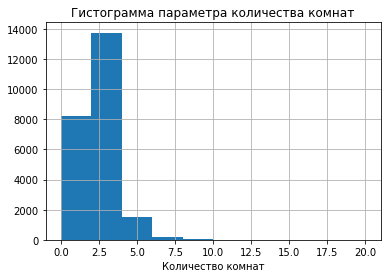

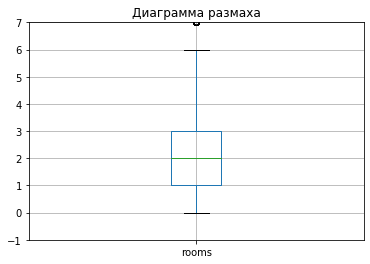

In [25]:
# построем гистограмму на параметр числа комнат
df['rooms'].hist(bins=10, range=(0, 20)) 
plt.title('Гистограмма параметра количества комнат')
plt.xlabel('Количество комнат')
plt.show()

# с помощью диаграммы размаха "boxplot()" смотрим редкие и выбивающиеся значения числа комнат
df.boxplot('rooms') 
plt.ylim(-1, 7)
plt.title('Диаграмма размаха')
plt.show()

Была построена гистограмма на параметр числа комнат. При рассмотрении графика и метода 'describe()' были обнаружены высокие значения до 19 комнат. Это давольно аномальное и редкое зачение. Аномалные значения, которые находятся после 5, можно исключть.

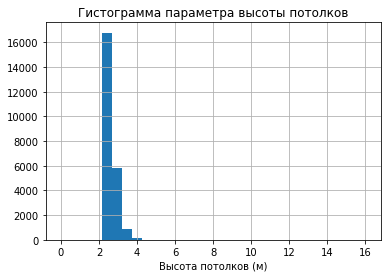

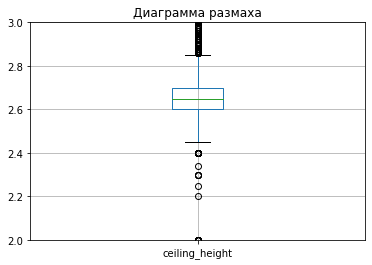

In [26]:
# построем гистограмму на параметр высоты потолков
df['ceiling_height'].hist(bins=30, range=(0, 16)) 
plt.title('Гистограмма параметра высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.show()

# с помощью диаграммы размаха "boxplot()" смотрим редкие и выбивающиеся значения высоты потолков
df.boxplot('ceiling_height')
plt.ylim(2, 3)
plt.title('Диаграмма размаха')
plt.show()

Была построена гистограмма на параметр высоты потолков, в которой тоже присутствуют выбивающие значения, максимальная высота потолков доходит почти до 5м. Исключаем аномальные значения в диапазоне до 2.45 и после 2.85

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

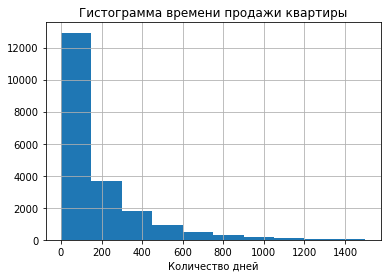

In [27]:
# изучим данные времени продажи квартиры методом (describe())
display(df['days_exposition'].describe())

# гистограмма времени продажи квартиры
df['days_exposition'].hist(bins=10, range=(0, 1500))
plt.title('Гистограмма времени продажи квартиры')
plt.xlabel('Количество дней')
plt.show()

Среднее время продажи квартиры состовляет 180 дней, а медиана 90 дней. Если время продажи квартиры составило от 1 до 43 дней, то можно считать, что продажа состоялась очень быстро. Долгой продажей является более 214 дней. Максимальное время продажи состовляло 1580 дней.

In [28]:
# сделаем срез редких и выбивающиеся значений
df = df.query('(2.45 <= ceiling_height <= 2.85) and rooms <= 5 and (10 <= total_area <= 115) and (20000 <= price_meter <= 170000)')

С помощью диаграммы размаха "boxplot()" выявлены редкие значения в таблицах. Создан срез без аномальных значений, благодаря которому, можно будет сделать более вероятный анализ данных. 

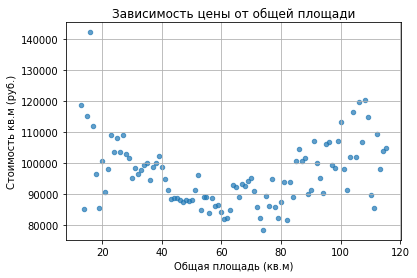

In [29]:
# определим зависимость цены от общей площади
df.pivot_table(index='total_area', values='price_meter', aggfunc='median').reset_index().plot(x='total_area', y='price_meter', kind='scatter', alpha=0.7, grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

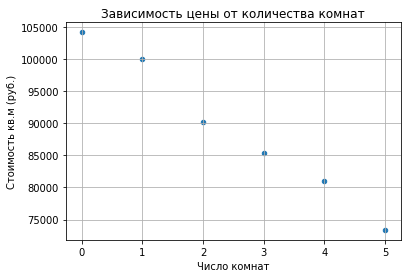

In [30]:
# определим зависимость цены от количества комнат
df.pivot_table(index='rooms', values='price_meter', aggfunc='median').reset_index().plot(x='rooms', y='price_meter', kind='scatter', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

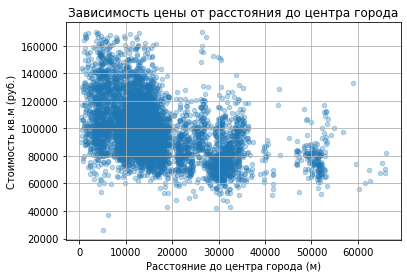

In [31]:
# определим зависимость цены от расстояния до центра города
df.pivot_table(index='cityCenters_nearest', values='price_meter', aggfunc='median').reset_index().plot(x='cityCenters_nearest', y='price_meter', kind='scatter', alpha=0.3, grid=True)
plt.title('Зависимость цены от расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

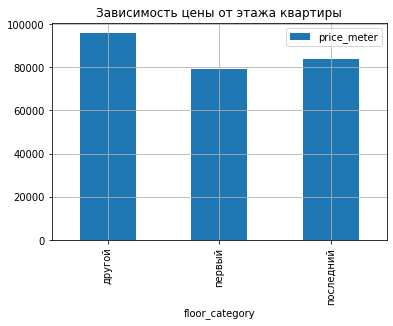

In [32]:
# зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
df.pivot_table(index='floor_category', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от этажа квартиры')
plt.show()

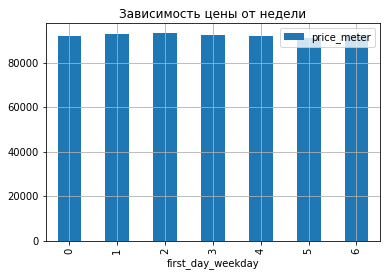

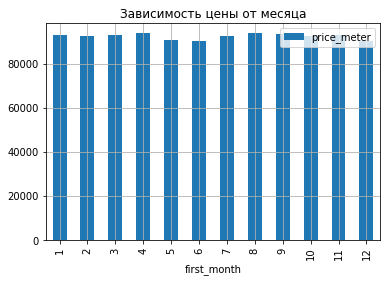

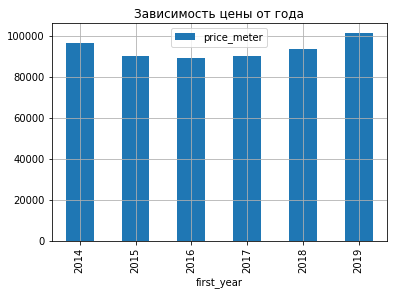

In [33]:
# зависимость цены от даты размещения: дня недели, месяца и года
df.pivot_table(index='first_day_weekday', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от недели')
df.pivot_table(index='first_month', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от месяца')
df.pivot_table(index='first_year', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от года')
plt.show()

Зависимости стоимости квартиры от даты размещения объявления практически нет. Есть небольшая зависимость в расположении этажа, первый этаж наиболее дешевый по сравнению с другими.

In [34]:
# определим 10 населённых пунктов с наибольшим числом объявлений
top_locality = df['locality_name'].value_counts().head(10)
top_locality

санкт-петербург      12332
посёлок мурино         515
посёлок шушары         434
всеволожск             380
посёлок парголово      326
колпино                316
пушкин                 308
деревня кудрово        296
гатчина                282
выборг                 204
Name: locality_name, dtype: int64

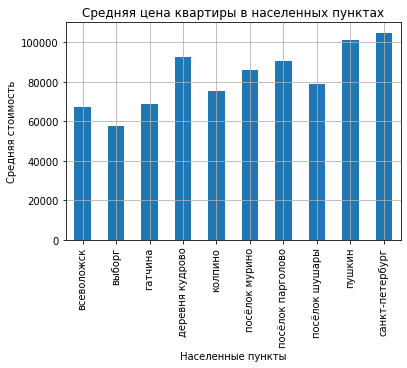

In [35]:
# определим среднюю цену квадратного метра в выбранных населённых пунктах
df[df['locality_name'].isin(top_locality.index)].groupby('locality_name')['price_meter'].mean().plot(kind='bar', grid=True)
plt.title('Средняя цена квартиры в населенных пунктах')
plt.xlabel('Населенные пункты')
plt.ylabel('Средняя стоимость')
plt.show()


Средняя цена в выбранных населенных пунктах варьируется от 57000 до 105 т.р. за квадратный метр.

In [36]:
# населённый пункт с самой высокой стоимостью жилья
top_locality_max_price = df[df['locality_name'].isin(top_locality.index)]['price_meter'].max()
top_locality_max_name = df[df['locality_name'].isin(top_locality.index)]['locality_name'].max()
print('Максимальная стоимость жилья находиться в городе', top_locality_max_name, 'стоимость которой составляет', top_locality_max_price, "т.р. за квадратный метр.")


Максимальная стоимость жилья находиться в городе санкт-петербург стоимость которой составляет 170000 т.р. за квадратный метр.


In [37]:
# населённые пункты с самой низкой стоимостью жилья
top_locality_max_price = df[df['locality_name'].isin(top_locality.index)]['price_meter'].min()
top_locality_max_name = df[df['locality_name'].isin(top_locality.index)]['locality_name'].min()
print('Минимальная стоимость жилья находиться в городе', top_locality_max_name, 'стоимость которой составляет', top_locality_max_price, "т.р. за квадратный метр.")


Минимальная стоимость жилья находиться в городе всеволожск стоимость которой составляет 23793 т.р. за квадратный метр.


/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


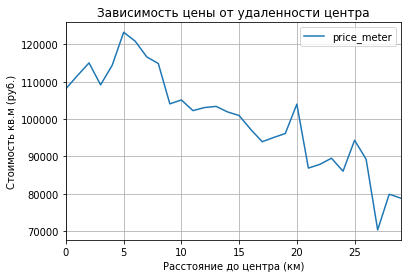

In [38]:
# выводим квартиры в Санкт-Петербурге, которые находятся близко к центру
spb = df.query('locality_name == "санкт-петербург"')
spb['cityCenters_nearest_km'] = (spb['cityCenters_nearest'] / 1000).round()

# посчитаем среднюю цену для каждого километра 
spb.groupby('cityCenters_nearest_km')['price_meter'].median().reset_index().plot(x='cityCenters_nearest_km', y='price_meter', style='-', grid=True)
plt.title('Зависимость цены от удаленности центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

Был создан столбец с расстоянием до центра в километрах и округлен до целой части. После посчитана средняя цена для каждого километра и построен график, где показывается как цена зависит от удаленности центра. График сильно меняется на границе '7' - это и есть центральная зона.

In [39]:
# выделяем сегмент квартир в центре 
spb_center = spb.query('cityCenters_nearest_km <= 7')
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_weekday,first_month,first_year,ratio_living_total_area,retio_kitchen_total_area,cityCenters_nearest_km
count,1375.000000,1.375000e+03,1375.000000,1375.000000,1375.000000,1375.000000,1370.000000,1375.000000,1362.000000,1375.000000,...,1375.000000,1044.000000,1258.000000,1375.000000,1375.000000,1375.00000,1375.000000,1370.000000,1362.000000,1375.000000
mean,9.288727,7.701009e+06,65.639273,2.244364,2.663127,8.066909,38.091536,4.498909,11.250595,0.371636,...,1.284364,478.696360,224.127981,119181.375273,2.602182,6.63200,2017.077818,0.570511,0.183047,4.827636
std,5.564651,2.882715e+06,22.340443,0.940707,0.072268,4.422538,16.093914,3.162249,4.663232,0.776799,...,1.033575,256.250605,262.681885,24699.751820,1.738215,3.37684,1.067133,0.105947,0.080366,1.600616
min,0.000000,1.686000e+06,13.000000,0.000000,2.450000,2.000000,6.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,26250.000000,0.000000,1.00000,2014.000000,0.190000,0.050000,0.000000
25%,5.000000,5.550000e+06,47.000000,2.000000,2.650000,5.000000,25.500000,2.000000,8.000000,0.000000,...,1.000000,265.750000,52.000000,100000.000000,1.000000,4.00000,2016.500000,0.512500,0.130000,4.000000
50%,9.000000,7.100000e+06,64.000000,2.000000,2.650000,6.000000,36.075000,4.000000,10.000000,0.000000,...,1.000000,458.500000,119.000000,118103.000000,3.000000,7.00000,2017.000000,0.580000,0.160000,5.000000
75%,13.000000,9.400000e+06,83.000000,3.000000,2.650000,10.000000,50.000000,6.000000,13.000000,0.000000,...,2.000000,662.000000,297.500000,138730.000000,4.000000,10.00000,2018.000000,0.640000,0.220000,6.000000
max,32.000000,1.835333e+07,115.000000,5.000000,2.850000,25.000000,90.200000,21.000000,40.200000,5.000000,...,3.000000,1199.000000,1477.000000,169880.000000,6.000000,12.00000,2019.000000,0.930000,0.940000,7.000000


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,first_day_weekday,first_month,first_year,ratio_living_total_area,retio_kitchen_total_area,cityCenters_nearest_km
count,12332.000000,1.233200e+04,12332.000000,12332.000000,12332.000000,12332.000000,12280.000000,12332.000000,12254.000000,12332.000000,...,12332.000000,5818.000000,10991.000000,12332.000000,12332.000000,12332.000000,12332.000000,12280.000000,12254.000000,12301.000000
mean,10.009244,5.636560e+06,53.944210,1.942669,2.632714,12.294924,30.780331,6.612228,9.748345,0.621635,...,0.654557,542.865418,166.672914,104911.051898,2.581171,6.434966,2017.369364,0.563113,0.191645,12.853833
std,5.574387,2.390153e+06,19.030422,0.897580,0.083886,6.350636,13.014009,5.048300,3.920089,0.964900,...,0.826847,279.824248,208.476936,21255.085794,1.790045,3.452363,1.030968,0.099803,0.072371,4.178625
min,0.000000,1.190000e+06,13.000000,0.000000,2.450000,1.000000,3.000000,1.000000,1.300000,0.000000,...,0.000000,13.000000,1.000000,24490.000000,0.000000,1.000000,2014.000000,0.070000,0.040000,0.000000
25%,6.000000,3.995000e+06,40.000000,1.000000,2.580000,9.000000,18.500000,3.000000,7.000000,0.000000,...,0.000000,330.000000,39.000000,89619.750000,1.000000,3.000000,2017.000000,0.500000,0.140000,11.000000
50%,10.000000,4.990000e+06,50.000000,2.000000,2.650000,10.000000,29.700000,5.000000,9.000000,0.000000,...,0.000000,527.000000,88.000000,102000.000000,3.000000,6.000000,2017.000000,0.570000,0.180000,13.000000
75%,14.000000,6.600000e+06,64.000000,3.000000,2.650000,16.000000,39.825000,9.000000,11.000000,1.000000,...,1.000000,758.000000,206.000000,117576.500000,4.000000,10.000000,2018.000000,0.630000,0.240000,15.000000
max,50.000000,1.870000e+07,115.000000,5.000000,2.850000,52.000000,93.600000,33.000000,60.000000,5.000000,...,3.000000,1337.000000,1553.000000,170000.000000,6.000000,12.000000,2019.000000,1.010000,1.150000,29.000000


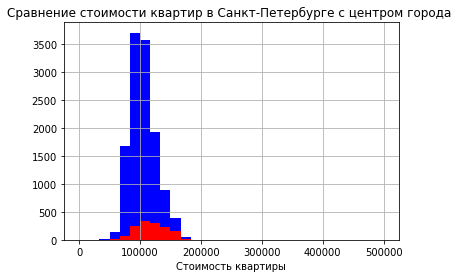

In [40]:
# изучим стомость квартиры всего Санкт-Петербурга
spb['price_meter'].hist(bins=30, range=(0, 500000),  color='blue')
display(spb.describe())

# изучим параметр стоимости квартиры для центра Санкт-Петербурга
spb_center['price_meter'].hist(bins=30, range=(0, 500000), color='red')
plt.xlabel('Стоимость квартиры')
plt.title('Сравнение стоимости квартир в Санкт-Петербурге с центром города ')
plt.show()

Цены за квадратный метр в центре Санкт-Петербурга составляют в среднем 120000 т.р., это немного больше, чем во всем городе, там стоимость квартиры составляет в среднем 105000 т.р.

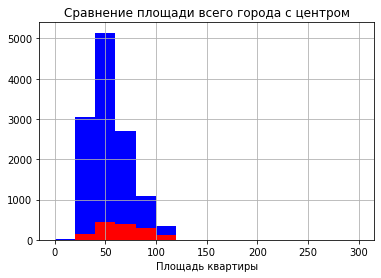

In [41]:
# изучим площадь квартиры во всем Санкт-Петербурге
spb['total_area'].hist(bins=15, range=(0, 300), color='blue')

# изучим параметр площади квартиры для центра Санкт-Петербурга
spb_center['total_area'].hist(bins=15, range=(0, 300), color='red')
plt.xlabel('Площадь квартиры')
plt.title('Сравнение площади всего города с центром')
plt.show()

Площадь квартир в центре и во всем Санкт-Петербурге примерно одинаковая. В среднем площадь квартиры в Санкт-Петербурге составляет 54 квадратных метров, в центре площадь составляет около 65 квадратных метров.

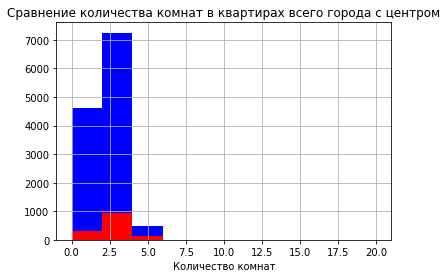

In [42]:
# изучим число комнат в квартире во всем Санкт-Петербурге
spb['rooms'].hist(bins=10, range=(0, 20),  color='blue') 

# изучим параметр количества комнат в квартире для центра Санкт-Петербурга
spb_center['rooms'].hist(bins=10, range=(0, 20), color='red') 
plt.xlabel('Количество комнат')
plt.title('Сравнение количества комнат в квартирах всего города с центром')
plt.show()

Количество комнат в центре и самом городе совпадает, чаще всего это двухкомнатные квартиры.

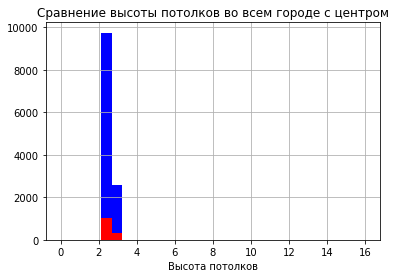

In [43]:
# изучим высоту потолков в квартирах во всем Санкт-Петербурге
spb['ceiling_height'].hist(bins=30, range=(0, 16),  color='blue') 

# изучим параметр высоты потолков в квартире для центра Санкт-Петербурга
spb_center['ceiling_height'].hist(bins=30, range=(0, 16),  color='red') 
plt.xlabel('Высота потолков')
plt.title('Сравнение высоты потолков во всем городе с центром')
plt.show()

Высота потолков тоже примерно одинаковая (в среднем 2.6 м).

Цены за квадратный метр в центре Санкт-Петербурга составляют в среднем 120000 т.р., это немного больше, чем во всем городе, там стоимость квартиры составляет в среднем 105000 т.р.
Площадь квартир в центре и во всем Санкт-Петербурге примерно одинаковая. В среднем площадь квартиры в Санкт-Петербурге составляет 54 квадратных метров, в центре площадь составляет около 65 квадратных метров.
Количество комнат в центре и самом городе совпадает, чаще всего это двухкомнатные квартиры.
Высота потолков тоже примерно одинаковая (в среднем 2.6 м).

/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


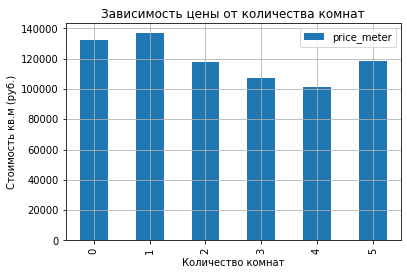

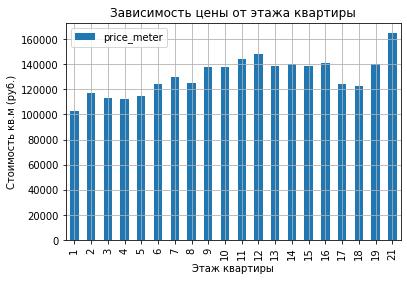

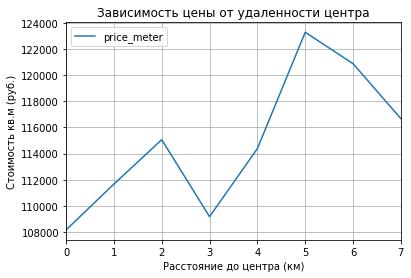

In [44]:
# изучим факторы центра Санкт-Петербурга, которые влияют на стоимость квартиры
spb_center.pivot_table(index='rooms', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость кв.м (руб.)')

spb_center.pivot_table(index='floor', values='price_meter', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Стоимость кв.м (руб.)')

spb_center['cityCenters_nearest'] = (spb_center['cityCenters_nearest'] / 1000).round()
spb_center.pivot_table(index='cityCenters_nearest', values='price_meter', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от удаленности центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

In [45]:
# посмотрим корреляцию факторов центра Санкт-Петербурга
spb_center_factors = spb_center.pivot_table(index='price_meter', values=['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition'], aggfunc='mean')
display(spb_center_factors.corr())


,cityCenters_nearest,floor,rooms
cityCenters_nearest,1.000000,0.271642,-0.160451
floor,0.271642,1.000000,-0.103646
rooms,-0.160451,-0.103646,1.000000


Есть небольшая положительная корреляция в значениях этажа. Это значит: чем выше этаж, тем выше стоимость квартиры.

/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


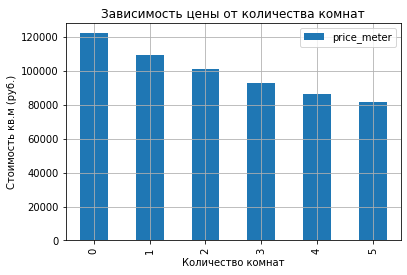

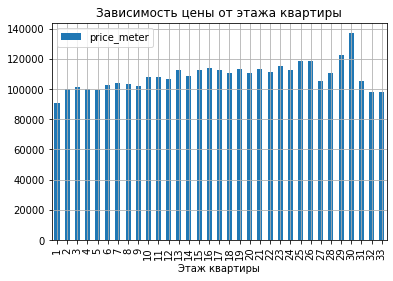

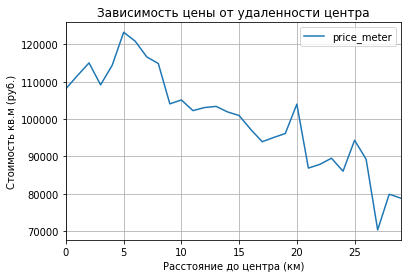

In [46]:
# изучим факторы всего Санкт-Петербурга, которые влияют на стоимость квартиры
spb.pivot_table(index='rooms', values='price_meter', aggfunc='median').plot(kind='bar', style='o', grid=True)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость кв.м (руб.)') 

spb.pivot_table(index='floor', values='price_meter', aggfunc='median').plot(kind='bar', style='o', grid=True)
plt.title('Зависимость цены от этажа квартиры')
plt.xlabel('Этаж квартиры')

spb['cityCenters_nearest'] = (spb['cityCenters_nearest'] / 1000).round()
spb.pivot_table(index='cityCenters_nearest', values='price_meter', aggfunc='median').plot(grid=True)
plt.title('Зависимость цены от удаленности центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Стоимость кв.м (руб.)')
plt.show()

In [47]:
# посмотрим корреляцию факторов Санкт-Петербурга
spb_factors = spb.pivot_table(index='price_meter', values=['rooms', 'floor', 'cityCenters_nearest', 'first_day_exposition'], aggfunc='mean')
display(spb_factors.corr())

,cityCenters_nearest,floor,rooms
cityCenters_nearest,1.000000,0.131803,-0.069160
floor,0.131803,1.000000,-0.150673
rooms,-0.069160,-0.150673,1.000000


На этих показателях также есть небольшая положительная корреляция в значениях этажа и отрицательная корреляция в количестве комнат. Это значит, что при росте комнат, цента за квадратный метр немного снижается.

## Общий вывод

<br />  В ходе работы были изучены данные сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Установлены параметры, в которых были обнаружены и устранены редкие и выбивающие значения.
<br />  Далее были изучены данные времени продажи квартиры.Среднее время продажи квартиры состовляет 180 дней, а медиана 90 дней. Если время продажи квартиры составило от 1 до 43 дней, то можно считать, что продажа состоялась очень быстро. Долгой продажей является более 214 дней. Максимальное время продажи составило 1580 дней.
<br />  Далее изучены факторы, которые больше всего влияют на стоимость квартиры. Среди всех изцченных факторов есть небольшая зависимость только в расположении этажей, первый этаж наиболее дешевый по сравнению с другими.

Далее были расмотрены 10 населенных пунктов, у которых наибольшее число обявлений. Такими городами оказались:
1. Санкт-Петербург (15465 объявлений)
2. посёлок Мурино (520 объявлений)
3. посёлок Шушары (440 объявлений)
4. Всеволожск     (397 объявлений)
5. Пушкин        (366 объявлений)
6. Колпино        (337 объявлений)
7. посёлок Парголово (326 объявлений)
8. Гатчина         (306 объявлений)
9. деревня Кудрово   (299 объявлений)
10. Выборг          ( 237 объявлений)

<br />  Среди этих населенных пунктов были посчитаны самые высокие, низкие и средние цены квартир за квадратный метр:
<br />  Средняя цена в выбранных населенных пунктах варьируется от 57000 до 105000 т.р. за квадратный метр.
<br /> Максимальная стоимость жилья находиться в городе Санкт-петербург (170000 т.р. за квадратный метр)
<br /> Минимальная стоимость жилья находиться в городе Всеволожск (23793 т.р. за квадратный метр)
<br />
<br /> Далее идет сравнение параметров квартир в Санкт-Петербурге находящихся близко к центру с параметрами всего города.
<br /> Цены за квадратный метр в центре Санкт-Петербурга составляют в среднем 120000 т.р., это немного больше, чем во всем городе, там стоимость квартиры составляет в среднем 105000 т.р.
Площадь квартир в центре и во всем Санкт-Петербурге примерно одинаковая. В среднем площадь квартиры в Санкт-Петербурге составляет 54 квадратных метров, в центре площадь составляет около 65 квадратных метров.
Количество комнат в центре и самом городе совпадает, чаще всего это двухкомнатные квартиры.
Высота потолков тоже примерно одинаковая (в среднем 2.6 м).
<br />  Были изучены факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга (число комнат, этаж, удалённость от центра), но они практически не отличаются от всего города.

